<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/SplitData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign7: MissingValue/MICE+MissForest.xlsx')
df = df.iloc[:, 1:]
df.isnull().any()

PatientUID             False
PatientVisitUID        False
Slopes                 False
G1M2:ARB               False
G3M1:Statin            False
                       ...  
PricipalProblemCode    False
PricipalProblemName    False
InPatient              False
OutPatient             False
Emergency              False
Length: 70, dtype: bool

In [4]:
df

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L14:WBC,Sex,Age,NATNL,Location,PricipalProblemCode,PricipalProblemName,InPatient,OutPatient,Emergency
0,2299,5812902,-7.158596,100,100,34,0,0,0,0,...,9.410000,หญิง,75,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0
1,2299,6947220,5.550691,35,0,1,35,0,0,0,...,6.202946,หญิง,76,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0
2,2299,8186767,-6.063710,100,0,15,0,0,0,0,...,5.420000,หญิง,78,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0
3,2299,9385133,-12.812245,90,0,0,0,0,0,0,...,7.265258,หญิง,79,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,F411,Generalized anxiety disorder,0,1,0
4,2304,4916314,28.287500,0,0,0,0,0,0,0,...,6.704847,หญิง,58,ไทย,หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร,None,None,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,0,0,0,0,0,0,0,...,6.742022,ชาย,64,ไทย,หน่วยคลินิกพิเศษศูนย์บริการทางการแพทย์ชั้นเลิศ,44054006,Type 2 diabetes mellitus,0,1,0
52615,3319971,10553916,-4.256753,0,0,0,0,0,0,0,...,7.802948,หญิง,72,ไทย,หน่วยคลินิกพิเศษศูนย์บริการทางการแพทย์ชั้นเลิศ,44054006,Type 2 diabetes mellitus,0,1,0
52616,3320048,10572126,-0.692078,0,0,0,0,0,0,0,...,8.032939,ชาย,67,ไทย,TB (คลินิก)-D707,A150,"Tuberculosis of lung\, confirmed by sputum mic...",0,1,0
52617,3320050,10572565,7.217875,0,0,0,0,0,0,0,...,18.700000,ชาย,68,ไทย,โรคเลือดและต่อมน้ำเหลือง (คลินิก)-D716,414166008,"Extranodal NK/T-cell lymphoma, nasal type",0,1,0


## **Method 1**
>   Method 1: split equally but patient cross fold ❌

In [ ]:
import pandas as pd
import numpy as np

df.sort_values(by='Slopes', inplace=True)

# Initialize empty lists for 5 folds
num_folds = 5
folds = [[] for _ in range(num_folds)]

# Calculate the number of rows in each fold
total_rows = len(df)
rows_per_fold = total_rows // num_folds
remainder = total_rows % num_folds

# Initialize variables to keep track of the current fold and the current patient
current_fold = 0
current_patient = None

# Loop through the DataFrame
for index, row in df.iterrows():
    patient_uid = row['PatientUID']
    slopes = row['Slopes']

    # Check if it's a new patient
    if patient_uid != current_patient:
        # Move to the next fold
        current_fold += 1

        # If we've reached the end, go back to the first fold
        if current_fold >= num_folds:
            current_fold = 0

        # Update the current patient
        current_patient = patient_uid

    # Check if the fold is full (based on rows_per_fold)
    if len(folds[current_fold]) >= rows_per_fold + (1 if current_fold < remainder else 0):
        # Move to the next fold
        current_fold += 1

        # If we've reached the end, go back to the first fold
        if current_fold >= num_folds:
            current_fold = 0

    # Append the current row to the current fold
    folds[current_fold].append(index)

In [ ]:

for fold_index, fold_indices in enumerate(folds):
    fold_df = df.iloc[fold_indices]  # Get the DataFrame for the current fold
    num_rows = len(fold_df)
    min_slopes = fold_df['Slopes'].min()
    max_slopes = fold_df['Slopes'].max()

    print(f"Fold {fold_index + 1}:")
    print(f"Number of Rows: {num_rows}")
    print(f"Minimum Slopes Value: {min_slopes}")
    print(f"Maximum Slopes Value: {max_slopes}")
    print("\n")


Fold 1:
Number of Rows: 10524
Minimum Slopes Value: -67.94187817258883
Maximum Slopes Value: 72.43222222222222


Fold 2:
Number of Rows: 10524
Minimum Slopes Value: -79.00265251989389
Maximum Slopes Value: 106.8928571428572


Fold 3:
Number of Rows: 10524
Minimum Slopes Value: -65.20675675675675
Maximum Slopes Value: 95.21739130434784


Fold 4:
Number of Rows: 10524
Minimum Slopes Value: -74.92742346938775
Maximum Slopes Value: 74.21016042780748


Fold 5:
Number of Rows: 10523
Minimum Slopes Value: -67.40577889447236
Maximum Slopes Value: 79.00167785234899




In [ ]:
# Assuming you have already created and populated the 'folds' list as shown earlier

# Initialize a dictionary to track which patients are in each fold
patients_in_folds = {fold_index: set() for fold_index in range(5)}

# Iterate through the folds and record the unique patients in each fold
for fold_index, fold_indices in enumerate(folds):
    fold_df = df.iloc[fold_indices]  # Get the DataFrame for the current fold
    unique_patients = set(fold_df['PatientUID'].unique())
    patients_in_folds[fold_index] = unique_patients

# Check if any patient is in multiple folds
for fold_index, patient_set in patients_in_folds.items():
    for other_fold_index in range(fold_index + 1, 5):  # Optimize by avoiding duplicate checks
        other_patient_set = patients_in_folds[other_fold_index]
        common_patients = patient_set.intersection(other_patient_set)
        if common_patients:
            print(f"Error: Patients {common_patients} are in multiple folds ({fold_index + 1} and {other_fold_index + 1})")

# If no errors are printed, it means each patient is in only one fold


Error: Patients {24576, 163841, 901121, 868357, 2572293, 360456, 16393, 1155082, 876553, 1097740, 671756, 712721, 1892369, 712724, 188439, 712727, 172059, 892958, 1187871, 1327136, 876575, 434212, 1130532, 139306, 983083, 909356, 1343533, 2572333, 1294384, 1204273, 2670643, 696376, 671802, 655420, 1335356, 1155136, 409666, 499792, 966738, 1089619, 2859092, 213075, 958556, 139359, 1433702, 548968, 73836, 106605, 139375, 884848, 434287, 1163376, 278642, 1835124, 802934, 8312, 1474684, 1245310, 65665, 1433733, 688262, 630918, 811146, 1179787, 147599, 483476, 237718, 1024153, 131235, 688293, 663717, 2031783, 827560, 114854, 868520, 1368236, 98479, 622774, 1089722, 688315, 237759, 2506945, 565443, 532675, 377029, 221384, 519443, 745676, 884944, 1147088, 49360, 803028, 786646, 1638615, 721110, 32986, 65755, 1515741, 884959, 1384671, 729319, 1466602, 98539, 49387, 639211, 41199, 164080, 2482418, 1433846, 2121975, 131321, 106748, 1196285, 655615, 516352, 1097985, 49413, 327944, 147724, 41232, 

## **Method 2**
> Method 2 : split 5 folds with no patient cross other ✅

In [5]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with columns 'PatientUID' and 'Slopes'

# Sort the DataFrame by 'PatientUID' and then by 'Slopes' in ascending order
df.sort_values(by=['PatientUID', 'Slopes'], inplace=True)

# Initialize empty lists for 5 folds
num_folds = 5
folds = [[] for _ in range(num_folds)]

# Initialize a dictionary to keep track of which patients are in each fold
patients_in_folds = {fold_index: set() for fold_index in range(num_folds)}

# Initialize variables to keep track of the current fold and patient
current_fold = 0
current_patient = None

# Loop through the DataFrame
for index, row in df.iterrows():
    patient_uid = row['PatientUID']

    # Check if it's a new patient
    if patient_uid != current_patient:
        # Move to the next fold
        current_fold += 1

        # If we've reached the end, go back to the first fold
        if current_fold >= num_folds:
            current_fold = 0

        # Update the current patient
        current_patient = patient_uid

        # Add the patient to the current fold
        patients_in_folds[current_fold].add(current_patient)

    # Append the current row to the current fold
    folds[current_fold].append(index)


In [6]:
# Assuming you have already created and populated the 'folds' list as shown earlier

# Initialize a dictionary to track which patients are in each fold
patients_in_folds = {fold_index: set() for fold_index in range(5)}

# Iterate through the folds and record the unique patients in each fold
for fold_index, fold_indices in enumerate(folds):
    fold_df = df.iloc[fold_indices]  # Get the DataFrame for the current fold
    unique_patients = set(fold_df['PatientUID'].unique())
    patients_in_folds[fold_index] = unique_patients

# Check if any patient is in multiple folds
for fold_index, patient_set in patients_in_folds.items():
    for other_fold_index in range(fold_index + 1, 5):  # Optimize by avoiding duplicate checks
        other_patient_set = patients_in_folds[other_fold_index]
        common_patients = patient_set.intersection(other_patient_set)
        if common_patients:
            print(f"Error: Patients {common_patients} are in multiple folds ({fold_index + 1} and {other_fold_index + 1})")

# If no errors are printed, it means each patient is in only one fold


In [7]:

for fold_index, fold_indices in enumerate(folds):
    fold_df = df.iloc[fold_indices]  # Get the DataFrame for the current fold
    num_rows = len(fold_df)
    min_slopes = fold_df['Slopes'].min()
    max_slopes = fold_df['Slopes'].max()

    print(f"Fold {fold_index + 1}:")
    print(f"Number of Rows: {num_rows}")
    print(f"Minimum Slopes Value: {min_slopes}")
    print(f"Maximum Slopes Value: {max_slopes}")
    print("\n")


Fold 1:
Number of Rows: 10603
Minimum Slopes Value: -65.68098958333333
Maximum Slopes Value: 90.23139534883721


Fold 2:
Number of Rows: 10345
Minimum Slopes Value: -65.40011737089202
Maximum Slopes Value: 95.21739130434784


Fold 3:
Number of Rows: 10642
Minimum Slopes Value: -74.92742346938775
Maximum Slopes Value: 78.00791556728231


Fold 4:
Number of Rows: 10436
Minimum Slopes Value: -65.8168
Maximum Slopes Value: 106.8928571428572


Fold 5:
Number of Rows: 10593
Minimum Slopes Value: -79.00265251989389
Maximum Slopes Value: 74.46733668341709




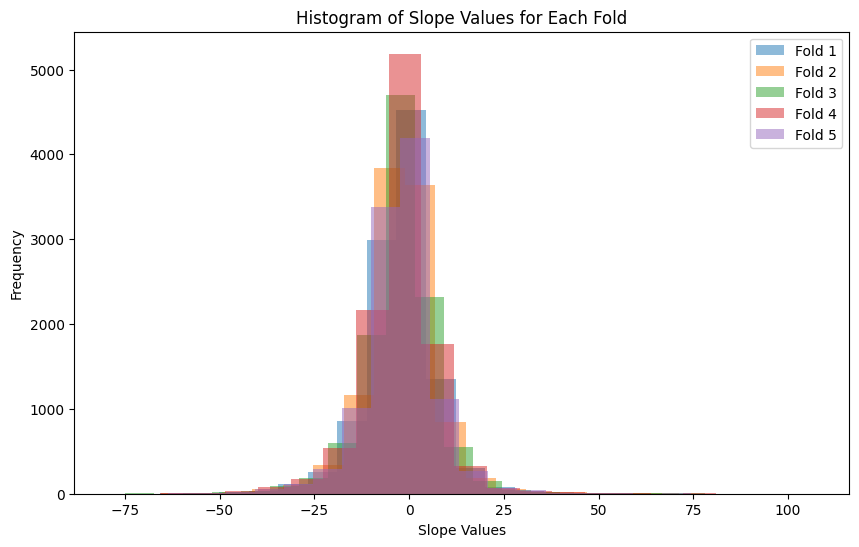

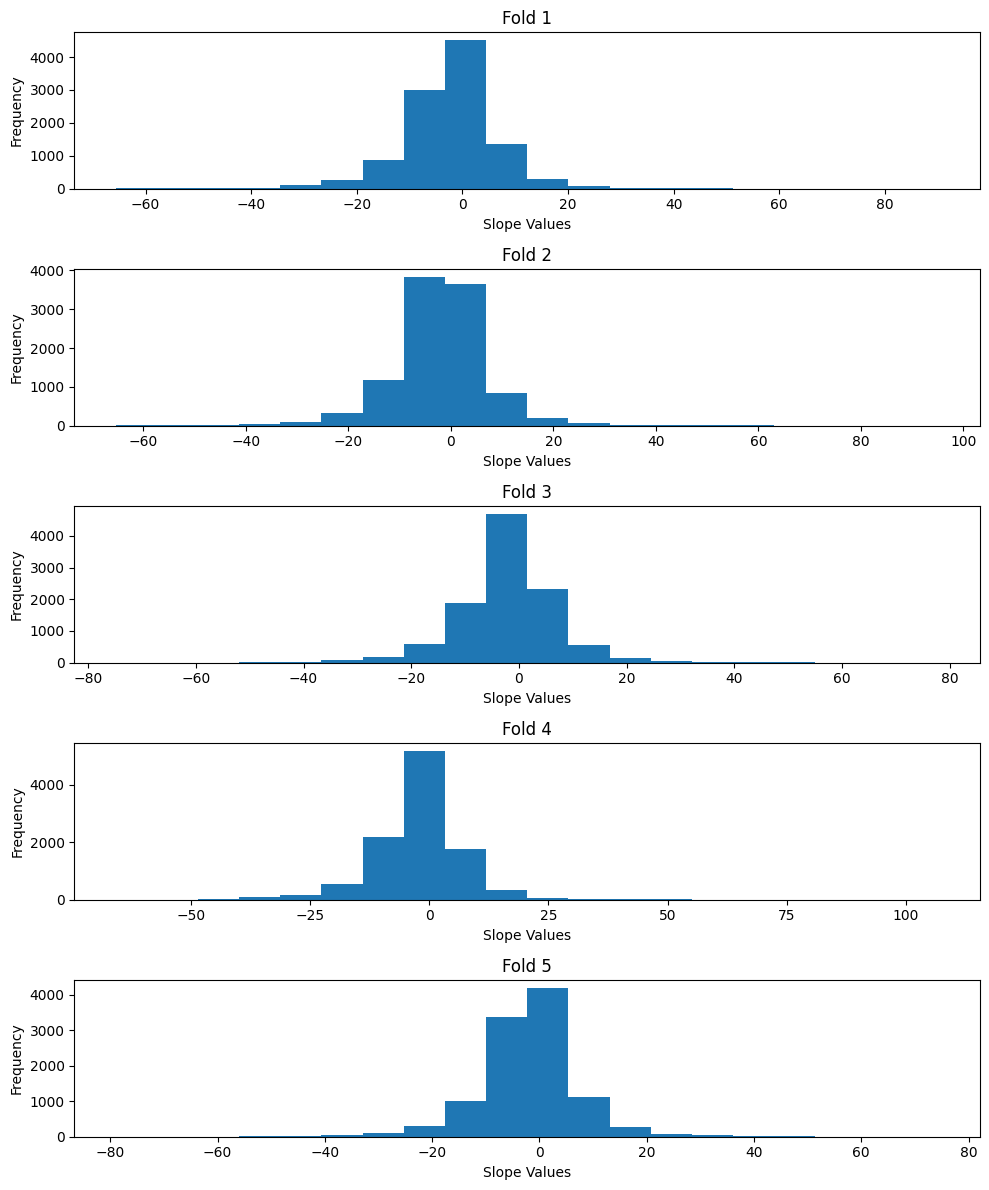

In [8]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Plot overlapping histograms for each fold
plt.figure(figsize=(10, 6))
for fold_idx, fold in enumerate(folds):
    plt.hist(df.loc[fold, 'Slopes'], alpha=0.5, label=f'Fold {fold_idx+1}', bins=20)

plt.xlabel('Slope Values')
plt.ylabel('Frequency')
plt.title('Histogram of Slope Values for Each Fold')
plt.legend()
plt.show()

# Alternatively, plot separate histograms for each fold
plt.figure(figsize=(10, 12))
for fold_idx, fold in enumerate(folds):
    plt.subplot(5, 1, fold_idx+1)
    plt.hist(df.loc[fold, 'Slopes'], bins=20)
    plt.xlabel('Slope Values')
    plt.ylabel('Frequency')
    plt.title(f'Fold {fold_idx+1}')

plt.tight_layout()
plt.show()


In [ ]:
# Create a mapping of which fold each row belongs to
fold_mapping = {}
for fold_idx, fold in enumerate(folds):
    for row_idx in fold:
        fold_mapping[row_idx] = fold_idx

# Add a new column to your DataFrame to indicate the fold for each row
df['Fold'] = [fold_mapping[idx] for idx in df.index]


In [ ]:
df

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,Sex,Age,NATNL,Location,PricipalProblemCode,PricipalProblemName,InPatient,OutPatient,Emergency,Fold
3,2299,9385133,-12.812245,90,0,0,0,0,0,0,...,หญิง,79,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,F411,Generalized anxiety disorder,0,1,0,1
0,2299,5812902,-7.158596,100,100,34,0,0,0,0,...,หญิง,75,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0,1
2,2299,8186767,-6.063710,100,0,15,0,0,0,0,...,หญิง,78,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0,1
1,2299,6947220,5.550691,35,0,1,35,0,0,0,...,หญิง,76,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0,1,0,1
5,2304,6395251,-8.126415,0,100,0,0,0,0,0,...,หญิง,59,ไทย,ความดันโลหิตสูงวิกฤต (คลินิก)-DV193,1201005,Benign essential hypertension,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,0,0,0,0,0,0,0,...,ชาย,64,ไทย,หน่วยคลินิกพิเศษศูนย์บริการทางการแพทย์ชั้นเลิศ,44054006,Type 2 diabetes mellitus,0,1,0,4
52615,3319971,10553916,-4.256753,0,0,0,0,0,0,0,...,หญิง,72,ไทย,หน่วยคลินิกพิเศษศูนย์บริการทางการแพทย์ชั้นเลิศ,44054006,Type 2 diabetes mellitus,0,1,0,0
52616,3320048,10572126,-0.692078,0,0,0,0,0,0,0,...,ชาย,67,ไทย,TB (คลินิก)-D707,A150,"Tuberculosis of lung\, confirmed by sputum mic...",0,1,0,1
52617,3320050,10572565,7.217875,0,0,0,0,0,0,0,...,ชาย,68,ไทย,โรคเลือดและต่อมน้ำเหลือง (คลินิก)-D716,414166008,"Extranodal NK/T-cell lymphoma, nasal type",0,1,0,2
